In [77]:
""" 
----- IMPORTS ----- 
"""
import numpy as np

import matplotlib.pyplot as plt
import seaborn 

import yfinance as yf

from datetime import datetime

%matplotlib inline


# VALE 

**SUMMARY**

Vale is a Brazilian multinational corporation in the metals and mining industry, and is one of the largest logistics operators in Brazil. They are the largest producer of iron ore and nickel globally, and also produce manganese, ferroalloys, copper, bauxite, potash, kaolin, and cobalt. The company operates hydroelectric plants, railroads, ships, and ports to transport their products. Despite being the most valuable company in Latin America, Vale has faced criticism for its two catastrophic tailings dam failures in Mariana (2015) and Brumadinho (2019), which resulted in the loss of its license to operate eight dams and a decline in stock value. (- Wikipedia page)

**RATIONAL FOR CHOOSING TIME SERIES**

The article mentions that Vale, the Brazilian mining group, has received multiple bids for a stake in its base metals business, which includes nickel, copper, cobalt, and platinum group metals that are vital for the energy transition. The CEO of Vale has stated that the base metals unit could one day outgrow the company and float on the stock market. As the world moves towards electrification of transport and power, the demand for energy transition metals is expected to grow. Share prices for major mining companies have risen over the past year due to the growth in demand for energy transition metals. Therefore, as Vale's base metals unit is positioned to benefit from this trend, the stock of Vale could be worth watching for investors interested in the energy transition. Therefore, this report investigates this hypothesis by investigating the last 300 trading days of VALE stock.

**FT ARTICLE:** https://www.ft.com/content/b03bc946-73da-44d5-8d9e-5541ddb5038b

# Time Series

[*********************100%***********************]  1 of 1 completed


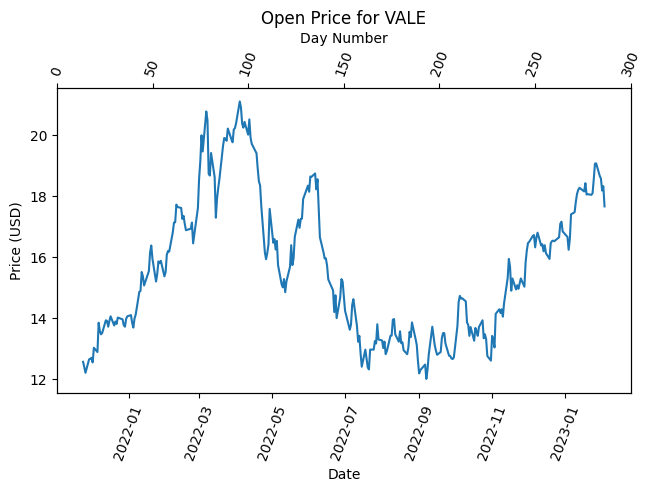

In [119]:
"""" 
----- TIME SERIES ----- 
"""

# get data
start_date = datetime(2021, 11, 24) #yyyy-mm-dd
end_date = datetime(2023, 2, 6)

vale = yf.download(tickers = 'VALE', start = start_date, end = end_date)

# open price date
dates = [idx.date() for idx in vale.index]
open = vale['Open'].values

# create plot
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(dates, open)

# add title, x-axis & y-axis
plt.title('Open Price for VALE')
ax.set_ylabel('Price (USD)')
ax.set_xlabel('Date')
plt.xticks(rotation=70);

# create secondary x-axis for observation nukber
ax2 = ax.twiny()
sec_x = range(0, 301, 50)
ax2.set_xticks(sec_x)
ax2.set_xlabel('Day Number')
plt.xticks(rotation=70);


**COMMENT ON THE TIME SERIES**

From a technical analysis perspective, the period around March 2022 can be seen as exhibiting a "cup" trend in the context of a "cup and handle" chart pattern. The pattern is characterized by a rounded bottom formation that is created by a gradual decline in the price of Vale stock, reaching its low point around September 2022, followed by a slow recovery back to its original level. This kind pattern is typically completed with a slight pullback that creates the "handle" part of the chart. Therefore, we might expect a slight drop in Vale stock in the short term. However, this pattern is considered bullish in the long term, indicating a potential for future price increase in Vale. 

We can dive deeper in understanding the behaviour of this times series and its characterist cup-like shape by referencing Vale's history over the past 300 trading days. Specifically, in January 2022, Vale experienced a tailings dam disaster in Minas Gerais, Brazil, which had severe consequences for both the environment and human life. In response, Vale suspended several of its operations and announced plans to decommission its remaining tailings dams. The aftermath of the disaster included financial challenges and a damaged reputation, such as a decrease in iron ore prices, lawsuits, and increased public scrutiny. These factors likely contributed to the sharp decline in VALE's stock price.

Despite these challenges, Vale continued to invest in new mining projects, and in August 2022, the company announced a settlement with the Brazilian authorities, bringing closure to the January 2022 events. Throughout the scrutiny Vale maintained its position as a leading base metal producer, and this has likely driven the gradual recovery seen in the stock price after August 2022. However, it is important to note that technical analysis alone is insuficient and provides guarantee of future price movements and should thefefore always be used in conjunction with other advanced analytical methods, such asARIMA models considered in this report.

# Moving Averages

**MOVING AVERAGE**

The moving average of a time series with time window $\tau$ is the average of the $\tau$ consecutive values in the time series, calculated for each time step and shifted by one time step at a time, resulting in a smoothed version of the original time series. The choice of $\tau$ determines the smoothness of the moving average. A larger $\tau$ results in a smoother moving average, while a smaller $\tau$ will result in a less smooth but more responsive moving average that is closer to the original time series.

Mathematically we can define it as follows: 

Let $X$ be the time series and $X_t$ be the value of the time series at time step $t$. Then, the moving average of $X$ with window size $\tau$ is defined as:

$$ Y_t = \frac{1}{\tau}(X_{t} + X_{t-1} + X_{t-2} + ... + X_{t-\tau}) $$

where $Y_t$ is the moving average at time step t. The moving average is calculated for each time step by taking the average of the $\tau$ consecutive values in the time series, starting from the current time step and including the $\tau - 1$ preceding values. The result is a smoothed version of the original time series.

In [121]:
def moving_average(X, t):
    """ 
    Computes the moving average for a time sereis X and window t

    Arguments:
        X: time series 
        t: window of moving average
    
    Returns:
        Y: moving average time series
    """
    cumsum = np.cumsum(X)
    Y = (cumsum[t-1:] - cumsum[:-t+1]) / t
    return Y

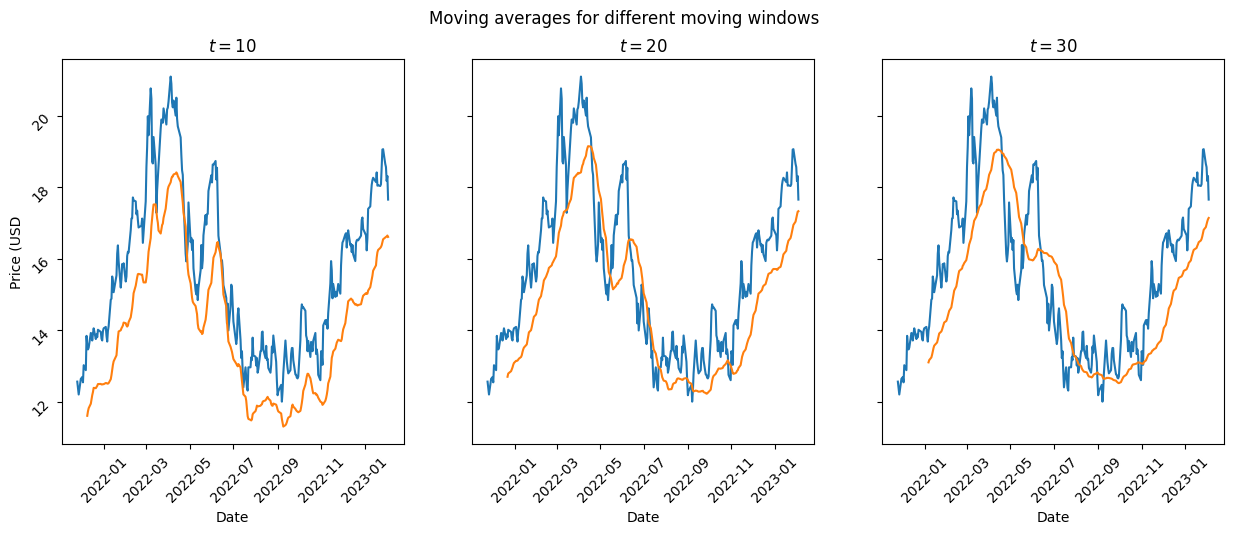

In [157]:
open_ma_10 = moving_average(open, 10)
open_ma_20 = moving_average(open, 20)
open_ma_30 = moving_average(open, 30)

# create plot
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (15, 5))

plt.suptitle('Moving averages for different moving windows')

ax1.set_title('$t = 10$')
ax1.set_ylabel('Price (USD')
ax1.set_xlabel('Date')
ax1.plot(dates, open)
ax1.plot(dates[10-1:], open_ma_10)
ax1.tick_params(labelrotation=45)

ax2.set_title('$t = 20$')
ax2.set_xlabel('Date')
ax2.plot(dates, open)
ax2.plot(dates[20-1:], open_ma_20)
ax2.tick_params(labelrotation=45)

ax3.set_title('$t = 30$')
ax3.set_xlabel('Date')
ax3.plot(dates, open)
ax3.plot(dates[30-1:], open_ma_30)
ax3.tick_params(labelrotation=45)


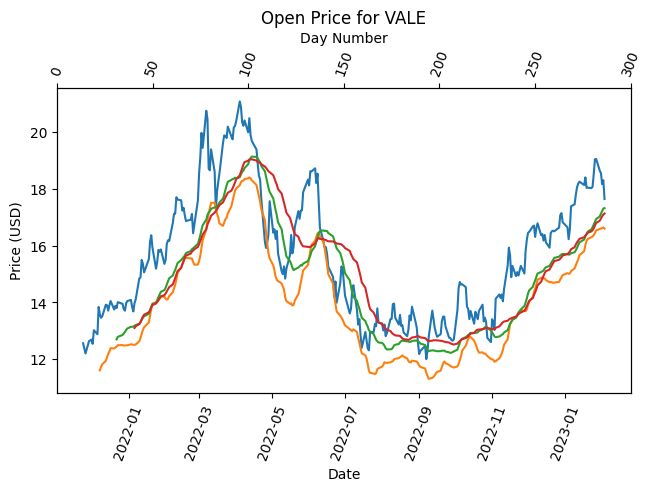

In [128]:
open_ma_10 = moving_average(open, 10)
open_ma_20 = moving_average(open, 20)
open_ma_30 = moving_average(open, 30)


# create plot
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(dates, open)
ax.plot(dates[10-1:], open_ma_10)
ax.plot(dates[20-1:], open_ma_20)
ax.plot(dates[30-1:], open_ma_30)

# add title, x-axis & y-axis
plt.title('Open Price for VALE')
ax.set_ylabel('Price (USD)')
ax.set_xlabel('Date')
plt.xticks(rotation=70);

# create secondary x-axis for observation nukber
ax2 = ax.twiny()
sec_x = range(0, 301, 50)
ax2.set_xticks(sec_x)
ax2.set_xlabel('Day Number')
plt.xticks(rotation=70);

#TODO: ADD LEGEND

**LINEAR RETURN**

The linear return of a time series is the change in the value of an investment over a specific period of time, calculated as the ratio of the current value to the initial value, minus 1. In other words, it measures the proportionate change in the value of an investment over time and is used as a basic measure of an investment's performance.

Mathematicall it is defined as follow: Given a price time series $P_t$, the return time series is defined as

$$ R_t = \frac{P_t - P_{t-1}}{P_t} $$

**LOG RETURN**

The log-return series $RL_t$ is similiarly defined as

$$ RL_t = \log(\frac{P_t}{P_{t-1}}) $$



In [159]:
def linear_return(P):
    """ 
    Computes the linear return of a price times series P

    Arguments:
        P: price time series

    Returns:
        R: linear return series
    """
    R = 1 - (P[:-1] / P[1:])
    
    return R

In [160]:
def log_return(P):
    """ 
    Computes the log return of a price times series P

    Arguments:
        P: price time series

    Returns:
        RL: log return series
    """
    RL = np.log(P[1:]/P[:-1])
    
    return RL

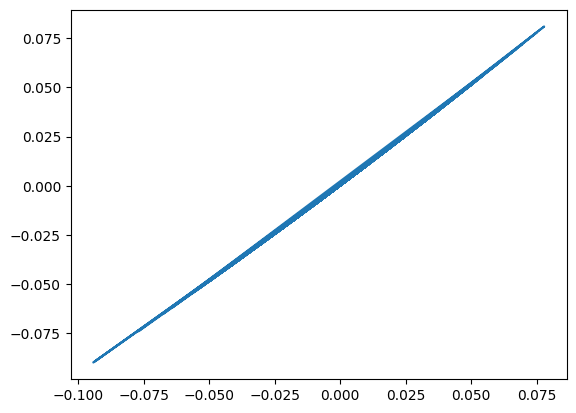

In [167]:
linear_r = linear_return(open)
log_r = log_return(open)

plt.plot(linear_r, log_r)

# Time Series Analysis

**AUTO-CORRELATION FUNCTION (ACF) OF A STATIONARY TIME SERIES**

The acf of a stationary time series is defined as follow:

$$ \rho(h) = \frac{\gamma(t+h, t)}{\sqrt{\gamma(t+h, t+h)\gamma(t, t)}} = \frac{\gamma(h, 0)}{\gamma(0, 0)} $$

where the following results have be used:
1. A weakly stationary times series has constant mean $\mu$
2. A weekly staitonary times sereies's $\gamma(s,t)$ depends only on $s$ and $t$ via their lag $h = |s - t| = |t+h - t|$. Therefore, $\gamma(t+h , t) = \gamma(h, 0)$ because the "lag" of these two shifts are equal (justifying the numerator). Further note that for any $\gamma(t, t) = \gamma(0,0)$ because again, the value of the "lag" are equal (justifying the denominator). 

**SAMPLE AUTO-CORRELATION FUNCTION**

The ACF for a limited number of observations $x_1, ..., x_n$$ is define as:

$$ \hat{\rho}(h) = \frac{\hat{\gamma}(h, 0)}{\hat{\gamma}(0, 0)} $$

where,

* $ \hat{\rho}(h) = \frac{1}{n} \sum_{t=1}^{n-h} (x_{t+h} - \bar{x})(x_t - \bar{x}) $
* $ \bar{x} = \frac{1}{n} \sum_{t=1}^n x_t $

In [168]:
def acf( P ):
    """  
    Returns the sample auto-correlation function for a price seiers P

    Arguments:
        P: Price time series

    Returns:
        rho: acf for the price time series P
    """
    n = len(P)
    mu = np.mean(P)

    # get gamma(0,0)
    gamma_0 = (1/n) * ((P - mu) @ (P - mu))

    # get gamma(h, 0)
    def gamma( h ):
        gamma_h = (1/n) * ((P[h:] - mu) @ (P[:n-h] - mu))
        return gamma_h
    
    gamma_h = np.array([gamma(h) for h in range(n)])

    # get rho(h)
    rho = gamma_h / gamma_0

    return rho

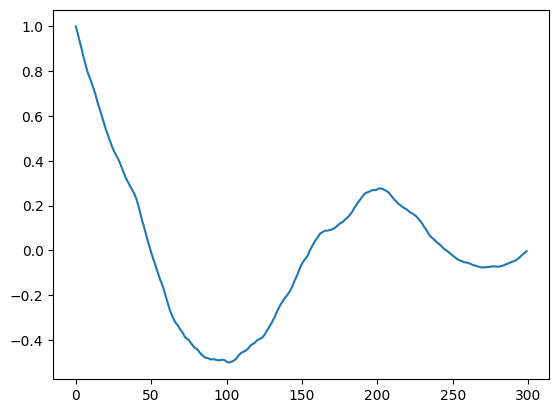

In [169]:
acf_vale = acf(open)

plt.plot(acf_vale)